### Student Information
Name: Juho Viljanen

Student ID: 114300350

GitHub ID: viljanenjuho

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [15]:
# PRE-EX1: quick load + light familiarization (run once, before EX1)

import pandas as pd, numpy as np, re

PATH = "/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(PATH)
df.columns = [c.strip().lower() for c in df.columns]

# pick text col (prefer common names, else longest string-like)
text_col = next((c for c in ["text","body","content","message","post"] if c in df.columns), None)
if text_col is None:
    stringish = [c for c in df.columns if df[c].dtype == object]
    text_col = max(stringish, key=lambda c: df[c].astype(str).str.len().mean()) if stringish else None
if not text_col:
    raise ValueError("No text-like column found.")

# pick label col (expect -1/0/1 as per assignment)
label_col = "label" if "label" in df.columns else ("sentiment" if "sentiment" in df.columns else None)
if not label_col:
    raise ValueError("No label column found (expected 'label' or 'sentiment').")

# minimal cleanup
df = df[[text_col, label_col] + [c for c in ["date","time","ticker","stock","symbol","id"] if c in df.columns]].copy()
df[text_col] = df[text_col].astype(str).str.strip()
df[label_col] = pd.to_numeric(df[label_col], errors="coerce")
df = df.dropna(subset=[text_col, label_col])
df = df[df[label_col].isin([-1.0, 0.0, 1.0])]
df = df.drop_duplicates(subset=[text_col])

# simple normalization preview (non-destructive)
url_pat = re.compile(r"https?://\S+|www\.\S+")
mention_pat = re.compile(r"[@#]\w+|\$\w+")
space_pat = re.compile(r"\s+")
def clean_text(s: str) -> str:
    s = s.lower()
    s = url_pat.sub(" ", s)
    s = mention_pat.sub(" ", s)
    s = re.sub(r"[^\w\s]", " ", s)
    return space_pat.sub(" ", s).strip()

df["text_clean"] = df[text_col].apply(clean_text)
df["label_name"] = df[label_col].map({-1.0:"negative", 0.0:"neutral", 1.0:"positive"})

# quick familiarization outputs
print("Columns:", df.columns.tolist())
print("Shape (clean):", df.shape)

vc = df[label_col].value_counts().sort_index()
print("\nLabel distribution:")
print(pd.DataFrame({"count": vc, "pct": (100*vc/vc.sum()).round(2)}))

df["text_len"] = df[text_col].str.len()
print("\nText length describe:")
print(df["text_len"].describe(percentiles=[.1,.25,.5,.75,.9,.95]).round(1))

ticker_col = next((c for c in ["ticker","stock","symbol"] if c in df.columns), None)
if ticker_col:
    print("\nTop 10 tickers:")
    print(df[ticker_col].astype(str).str.upper().value_counts().head(10))

print("\nPreview (orig -> clean):")
for t, tc in zip(df[text_col].head(3), df["text_clean"].head(3)):
    print(f"- {t[:80]!r} -> {tc[:80]!r}")




Columns: ['text', 'label', 'text_clean', 'label_name']
Shape (clean): (824, 4)

Label distribution:
       count    pct
label              
-1.0     315  38.23
 0.0     401  48.67
 1.0     108  13.11

Text length describe:
count     824.0
mean      146.9
std       238.5
min         1.0
10%        20.0
25%        39.0
50%        78.0
75%       163.2
90%       310.7
95%       465.5
max      2737.0
Name: text_len, dtype: float64

Preview (orig -> clean):
- 'Calls on retards' -> 'calls on retards'
- 'Stunt as in like why did they even make a big deal about starting it in the firs' -> 'stunt as in like why did they even make a big deal about starting it in the firs'
- 'Seeing lots of red in the ticker.' -> 'seeing lots of red in the ticker'


/var/folders/6x/c_m9mqnj6198t9nr1jh5q7f00000gn/T/ipykernel_13506/1542100829.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




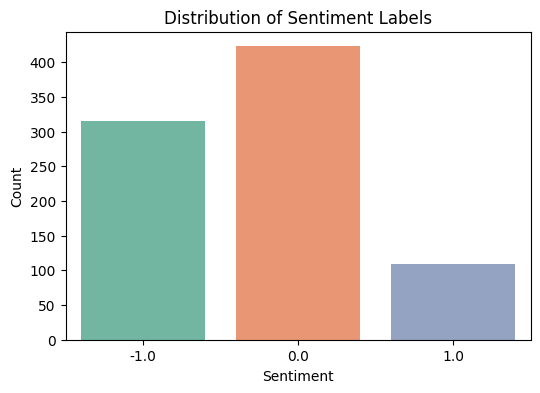

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=label_col, data=df, palette="Set2")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


python(55072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



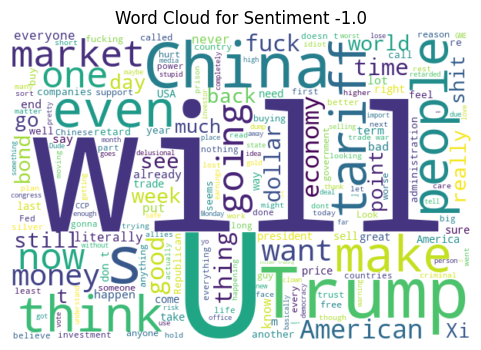

/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



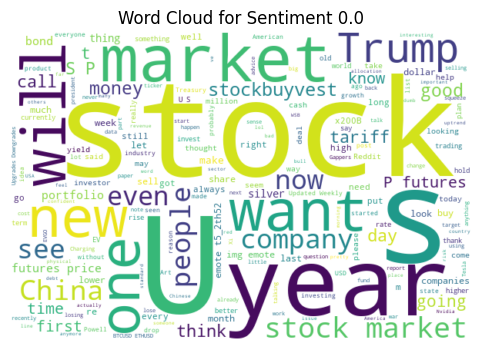

/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:684: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword



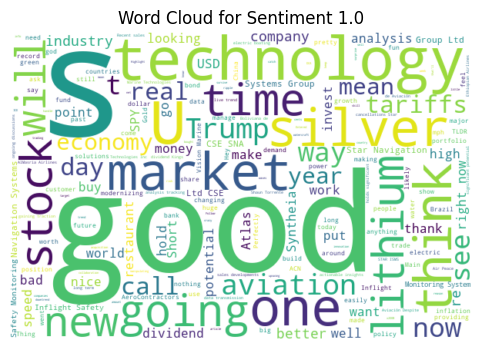

In [51]:
!pip install wordcloud
from wordcloud import WordCloud

for cat in df[label_col].unique():
    text_cat = " ".join(df[df[label_col] == cat][text_col].astype(str))
    wc = WordCloud(width=600, height=400, background_color="white").generate(text_cat)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Sentiment {cat}")
    plt.show()


In [16]:
### EX1
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv")

# Preview the structure
print("Columns in dataset:", df.columns.tolist())

# Print the text data for the first 3 samples
print(df['text'].head(3))  


Columns in dataset: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
Name: text, dtype: object


In [17]:
# EX2 — querying & selection (robust to missing label_name)

import pandas as pd, numpy as np, re
from IPython.display import display

assert "df" in globals() and "text_col" in globals() and "label_col" in globals(), "Run PRE-EX1 first."

# ensure label_name exists
if "label_name" not in df.columns:
    # normalize label to float and map to names
    df[label_col] = pd.to_numeric(df[label_col], errors="coerce")
    df["label_name"] = df[label_col].map({-1.0:"negative", 0.0:"neutral", 1.0:"positive"})

# optional columns
ticker_col = next((c for c in ["ticker","stock","symbol"] if c in df.columns), None)
date_col   = next((c for c in ["date","datetime","created","timestamp"] if c in df.columns), None)

# 1) boolean masks
pos = df[df[label_col] == 1.0]
neu = df[df[label_col] == 0.0]
neg = df[df[label_col] == -1.0]
print("Counts (pos/neu/neg):", len(pos), len(neu), len(neg))

# 2) contains keyword (case-insensitive)
kw = "earnings"
earnings = df[df[text_col].str.contains(kw, case=False, na=False)]
print(f"\nRows mentioning '{kw}':", len(earnings))
display(earnings[[c for c in [text_col, "label_name"] if c in earnings.columns]].head(3))

# 3) query() API
q_pos_short = df.query(f"{label_col} == 1.0").head(5)
print("\nquery(): first 5 positive")
display(q_pos_short[[c for c in [text_col, "label_name"] if c in q_pos_short.columns]])

# 4) isin() for multiple tickers (if present)
if ticker_col:
    tickers = ["AAPL","TSLA","NVDA","AMZN"]
    sub = df[df[ticker_col].astype(str).str.upper().isin(tickers)]
    print(f"\nRows with tickers in {tickers}: {len(sub)}")
    display(sub[[col for col in [ticker_col, text_col, "label_name"] if col in sub.columns]].head(5))

# 5) regex cashtags (extract) then filter
ctag_pat = re.compile(r"\$([A-Z]{1,5})")
df["_cashtag"] = df[text_col].str.extract(ctag_pat, expand=False)
cashtag_sub = df[df["_cashtag"].notna()]
print("\nTop cashtags:")
print(cashtag_sub["_cashtag"].str.upper().value_counts().head(10))

# 6) every 10th record from a class
every10_pos = pos.iloc[::10].head(5)
print("\nEvery 10th positive (first 5 shown):")
display(every10_pos[[c for c in [text_col, "label_name"] if c in every10_pos.columns]])

# 7) date range filter (if present)
if date_col:
    dtmp = df.copy()
    dtmp[date_col] = pd.to_datetime(dtmp[date_col], errors="coerce", utc=True)
    dmin, dmax = dtmp[date_col].min(), dtmp[date_col].max()
    if pd.notna(dmin) and pd.notna(dmax):
        mid = dmin + (dmax - dmin) / 2
        win_start, win_end = mid - pd.Timedelta(days=7), mid + pd.Timedelta(days=7)
        window = dtmp[(dtmp[date_col] >= win_start) & (dtmp[date_col] <= win_end)]
        print(f"\nDate window sample: {win_start.date()} to {win_end.date()} -> rows: {len(window)}")
        display(window[[c for c in [date_col, text_col, "label_name"] if c in window.columns]].head(5))

# cleanup helper columns
df.drop(columns=[c for c in ["_cashtag"] if c in df.columns], inplace=True, errors="ignore")


Counts (pos/neu/neg): 109 423 315

Rows mentioning 'earnings': 8


,text,label_name
6,Trump will respond to china increasing their t...,negative
48,\n\n [MarketWatch: Stock Market News - Financ...,neutral
63,Please use this thread to discuss your portfol...,neutral



query(): first 5 positive


,text,label_name
3,Vision Marine Technologies Inc. is rewriting t...,positive
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive
34,So they went from saying redditors are bad for...,positive
38,"Hey our net worth match now, we can be friends!",positive



Top cashtags:
_cashtag
BTCUS    6
AMC      2
EVGO     1
IRDM     1
FDX      1
DVAX     1
GE       1
UAA      1
MARA     1
KHC      1
Name: count, dtype: int64

Every 10th positive (first 5 shown):


,text,label_name
3,Vision Marine Technologies Inc. is rewriting t...,positive
78,I think it’s gonna work itself out. I bought t...,positive
168,The obvious can also be refreshing from CNBC: ...,positive
219,Same. Back to break even after that last rip b...,positive
319,Etrade has a feed of news articles about how r...,positive



Date window sample: 2023-02-27 to 2023-03-13 -> rows: 0


,datetime,text,label_name


In [18]:

# EX4 — Missing values per record (row-level)

import pandas as pd
import numpy as np
from IPython.display import display

assert "df" in globals(), "Run PRE-EX1 first."

d = df.copy()

# treat empty/whitespace-only strings as NaN in object columns
obj_cols = [c for c in d.columns if d[c].dtype == object]
if obj_cols:
    d[obj_cols] = d[obj_cols].replace(r"^\s*$", np.nan, regex=True)

# per-column overview (reference)
col_nulls = d.isna().sum().sort_values(ascending=False)
print("Missing per column:")
display(pd.DataFrame({"missing": col_nulls, "pct": (100*col_nulls/len(d)).round(2)}))

# per-record (row) missing counts
d["n_missing"] = d.isna().sum(axis=1)
print("\nRow-level missing value stats:")
display(d["n_missing"].describe().to_frame().T)

# distribution of rows by #missing fields
dist = d["n_missing"].value_counts().sort_index()
print("\nRows per n_missing:")
display(pd.DataFrame({"rows": dist, "pct": (100*dist/len(d)).round(2)}).head(15))

# show a few rows with missing data
rows_with_missing = d[d["n_missing"] > 0].head(5)
print("\nSample rows with missing fields:")
display(rows_with_missing)

# keep the annotated frame if needed downstream
df_ex4 = d  # df_ex4 has 'n_missing' column


Missing per column:


,missing,pct
downvotes,783,92.44
upvote_ratio,783,92.44
label,0,0.00
entities,0,0.00
sentiment,0,0.00
polarity,0,0.00
subjectivity,0,0.00
text,0,0.00
type,0,0.00
datetime,0,0.00



Row-level missing value stats:


,count,mean,std,min,25%,50%,75%,max
n_missing,847.0,1.848878,0.5289,0.0,2.0,2.0,2.0,2.0



Rows per n_missing:


,rows,pct
n_missing,,
0,64,7.56
2,783,92.44



Sample rows with missing fields:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,label_name,n_missing
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,negative,2
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,neutral,2
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,neutral,2
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,negative,2
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,neutral,2


In [19]:
#treat missing values

df["upvote_ratio"] = df["upvote_ratio"].fillna(0)
df["downvotes"] = df["downvotes"].fillna(0)


In [21]:
# EX6 — compare full dataset vs. a sample

import pandas as pd
import numpy as np
from IPython.display import display

assert "df" in globals() and "label_col" in globals(), "Run PRE-EX1 first."

# full dataset
X = df.copy()

# make a sample (e.g. 10% or max 500 rows)
X_sample = X.sample(frac=0.1, random_state=42) if len(X) > 500 else X.sample(n=100, random_state=42)

print("Shapes:")
print(" - Full dataset:", X.shape)
print(" - Sample:", X_sample.shape)

# compare label distributions
dist_full = X[label_col].value_counts(normalize=True).sort_index()
dist_sample = X_sample[label_col].value_counts(normalize=True).sort_index()

print("\nLabel distribution (%):")
print("Full:\n", (100*dist_full).round(2))
print("Sample:\n", (100*dist_sample).round(2))

# compare average text length
X["text_len"] = X[text_col].str.len()
X_sample["text_len"] = X_sample[text_col].str.len()
print("\nAvg text length:")
print("Full:", round(X["text_len"].mean(), 2))
print("Sample:", round(X_sample["text_len"].mean(), 2))

# optional: show a couple of rows side by side
print("\nPreview from sample:")
display(X_sample[[text_col, "label_name"]].head())


Shapes:
 - Full dataset: (847, 17)
 - Sample: (85, 17)

Label distribution (%):
Full:
 label
-1.0    37.19
 0.0    49.94
 1.0    12.87
Name: proportion, dtype: float64
Sample:
 label
-1.0    41.18
 0.0    38.82
 1.0    20.00
Name: proportion, dtype: float64

Avg text length:
Full: 147.44
Sample: 146.75

Preview from sample:


,text,label_name
457,"""We"" who?",neutral
342,Chicken jockey,neutral
280,Not great Bob,negative
275,"Speak for yourself, my wife is being harder on...",neutral
843,Where can I read this?,neutral


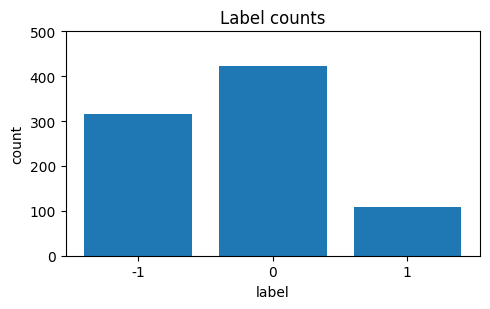

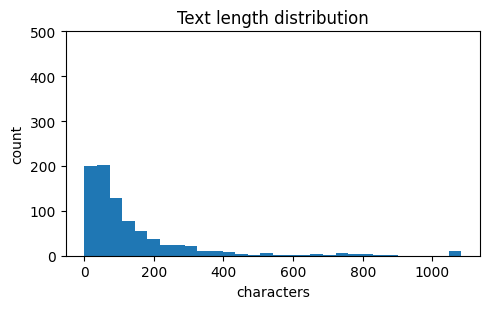

In [22]:
# EX7 — auto y-limits for plots (no hard-coding)

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

assert "df" in globals() and "label_col" in globals(), "Run PRE-EX1 first."

# helper: compute a padded upper limit (round to a "nice" number)
def auto_ylim(values, pad=0.08):
    vmax = float(np.nanmax(values)) if len(values) else 1.0
    upper = vmax * (1 + pad)
    # round up to a nice tick (1/2/5 * 10^k)
    mag = 10 ** np.floor(np.log10(max(upper, 1)))
    for m in [1, 2, 5, 10]:
        if upper <= m * mag:
            return 0, m * mag
    return 0, upper

# 1) label count bar chart with auto ylim
counts = df[label_col].value_counts().sort_index()  # -1,0,1
labels = [str(int(k)) if not np.isnan(k) else "nan" for k in counts.index]
bottom, top = auto_ylim(counts.values)

plt.figure(figsize=(5,3.2))
plt.bar(labels, counts.values)
plt.ylim(bottom, top)
plt.title("Label counts")
plt.xlabel("label")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# 2) histogram of text length with auto ylim
assert "text_col" in globals()
text_len = df[text_col].astype(str).str.len().clip(upper=np.percentile(df[text_col].astype(str).str.len(), 99))  # cap long tails
hist_vals, bin_edges = np.histogram(text_len, bins=30)
bottom, top = auto_ylim(hist_vals)

plt.figure(figsize=(5,3.2))
plt.hist(text_len, bins=30)
plt.ylim(bottom, top)
plt.title("Text length distribution")
plt.xlabel("characters")
plt.ylabel("count")
plt.tight_layout()
plt.show()


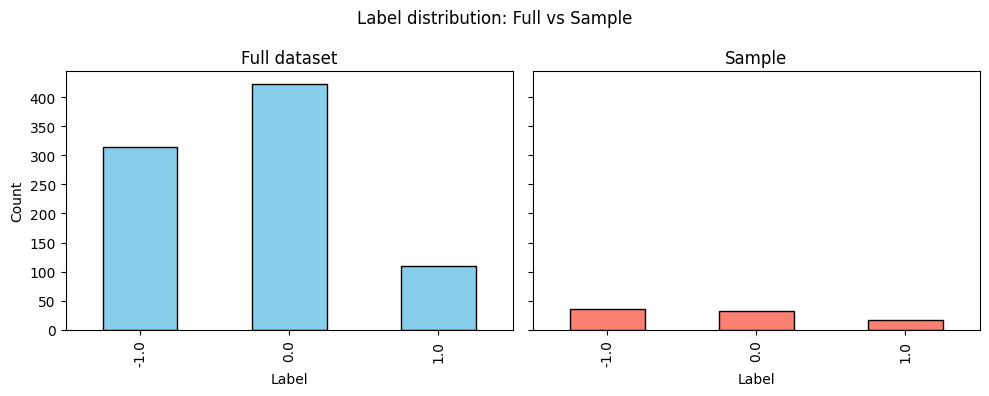

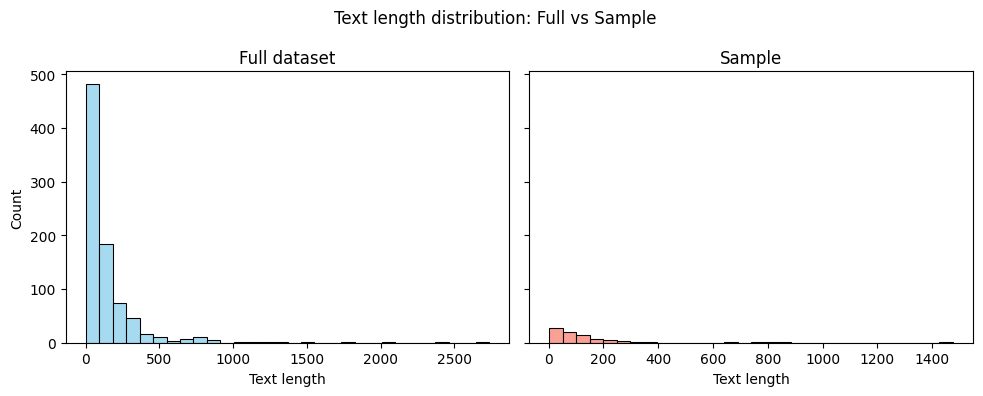

In [23]:
# EX8 — side-by-side comparison of distributions (full vs sample)

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

assert "df" in globals() and "X_sample" in globals(), "Run EX6 first."

# 1) label distributions
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

df[label_col].value_counts().sort_index().plot(
    kind="bar", ax=axes[0], color="skyblue", edgecolor="black"
)
axes[0].set_title("Full dataset")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

X_sample[label_col].value_counts().sort_index().plot(
    kind="bar", ax=axes[1], color="salmon", edgecolor="black"
)
axes[1].set_title("Sample")
axes[1].set_xlabel("Label")

plt.suptitle("Label distribution: Full vs Sample")
plt.tight_layout()
plt.show()

# 2) text length distributions
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

sns.histplot(df[text_col].str.len(), bins=30, ax=axes[0], color="skyblue")
axes[0].set_title("Full dataset")
axes[0].set_xlabel("Text length")

sns.histplot(X_sample[text_col].str.len(), bins=30, ax=axes[1], color="salmon")
axes[1].set_title("Sample")
axes[1].set_xlabel("Text length")

plt.suptitle("Text length distribution: Full vs Sample")
plt.tight_layout()
plt.show()


In [26]:
# EX9 — analyze the first record with a simple analyzer

import re
from collections import Counter
import nltk

# download stopwords if not already
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))
except LookupError:
    nltk.download("stopwords")
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))

assert "df" in globals() and "text_col" in globals(), "Run PRE-EX1 first."

# pick the first record
first_text = str(df[text_col].iloc[0])
print("Original text:\n", first_text, "\n")

# simple analyzer: lowercase, remove non-letters, tokenize
tokens = re.findall(r"[a-zA-Z]+", first_text.lower())
tokens_clean = [t for t in tokens if t not in stop_words and len(t) > 2]

print("Clean tokens:", tokens_clean[:20], "...")

# count frequencies
freqs = Counter(tokens_clean)
print("\nTop 10 frequent tokens:")
print(freqs.most_common(10))


Original text:
 Calls on retards 

Clean tokens: ['calls', 'retards'] ...

Top 10 frequent tokens:
[('calls', 1), ('retards', 1)]


In [27]:
# EX10 — map indices in document-term matrix back to words

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

assert "df" in globals() and "text_col" in globals(), "Run PRE-EX1 first."

# build vocabulary + document-term matrix (limit size for speed)
vectorizer = CountVectorizer(max_features=5000, stop_words="english")
X_counts = vectorizer.fit_transform(df[text_col].astype(str))

vocab = np.array(vectorizer.get_feature_names_out())
print("Vocabulary size:", len(vocab))

# pick the first record
row0 = X_counts[0]

# get indices of nonzero terms
indices = row0.nonzero()[1]
values = row0.data

print("\nNonzero entries in first record:")
for idx, val in zip(indices, values):
    print(f"Word: '{vocab[idx]}' -> Count: {val}")


Vocabulary size: 4105

Nonzero entries in first record:
Word: 'calls' -> Count: 1
Word: 'retards' -> Count: 1


Shape of sample term-document matrix: (200, 300)
Sparsity: 98.26% zeros


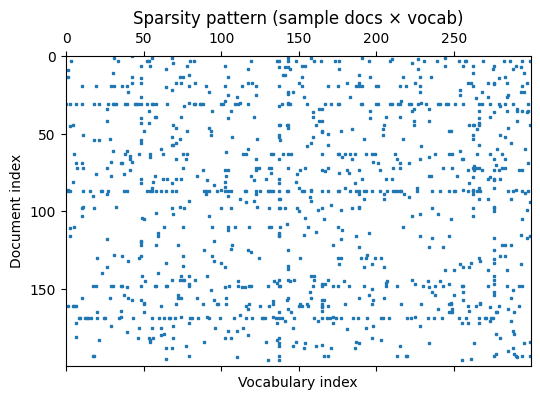

In [28]:
# EX11 — visualize sparsity of the term-document matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

assert "df" in globals() and "text_col" in globals(), "Run PRE-EX1 first."

# use a smaller subset for plotting clarity
n_docs = min(200, len(df))
sample_texts = df[text_col].astype(str).head(n_docs)

# limit vocab for readability
vectorizer = CountVectorizer(max_features=300, stop_words="english")
X_counts = vectorizer.fit_transform(sample_texts)

print("Shape of sample term-document matrix:", X_counts.shape)

# sparsity calculation
nnz = X_counts.nnz
total = X_counts.shape[0] * X_counts.shape[1]
sparsity = 100 * (1 - nnz/total)
print(f"Sparsity: {sparsity:.2f}% zeros")

# visualize as spy plot
plt.figure(figsize=(6,5))
plt.spy(X_counts, markersize=2)
plt.title("Sparsity pattern (sample docs × vocab)")
plt.xlabel("Vocabulary index")
plt.ylabel("Document index")
plt.show()


The term-document matrix for Reddit posts is extremely sparse (98% zeros). Each post only uses a small fraction of the vocabulary. This highlights the need for sparse matrix formats and motivates later steps such as TF-IDF or dimensionality reduction.

In [30]:
# EX12 — interactive word-frequency viz (Plotly)

import numpy as np, pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go

assert "df" in globals() and "text_col" in globals() and "label_col" in globals(), "Run PRE-EX1 first."

# ensure label names
if "label_name" not in df.columns:
    df[label_col] = pd.to_numeric(df[label_col], errors="coerce")
    df["label_name"] = df[label_col].map({-1.0:"negative", 0.0:"neutral", 1.0:"positive"})

# fit vocab on all texts
vectorizer = CountVectorizer(stop_words="english", max_features=5000, min_df=2)
X = vectorizer.fit_transform(df[text_col].astype(str))
terms = np.array(vectorizer.get_feature_names_out())

def topk_counts(mask=None, k=25):
    """Return top-k term counts; mask can be None / pandas Series / list / np array."""
    Xm = X
    if mask is not None:
        m = np.asarray(mask, dtype=bool)           # <-- convert Series -> numpy bool array
        if m.shape[0] != X.shape[0]:
            raise ValueError("Mask length does not match number of documents.")
        if m.any():
            Xm = X[m]
        else:
            return pd.DataFrame({"term": [], "count": []})
    counts = np.asarray(Xm.sum(axis=0)).ravel()
    if counts.sum() == 0:
        return pd.DataFrame({"term": [], "count": []})
    k = min(k, (counts > 0).sum())
    idx = np.argpartition(-counts, kth=max(k-1, 0))[:k]
    idx = idx[np.argsort(-counts[idx])]
    return pd.DataFrame({"term": terms[idx], "count": counts[idx]})

groups = {
    "All":      topk_counts(None, k=25),
    "positive": topk_counts(df[label_col].to_numpy() == 1.0, k=25),
    "neutral":  topk_counts(df[label_col].to_numpy() == 0.0, k=25),
    "negative": topk_counts(df[label_col].to_numpy() == -1.0, k=25),
}

# build figure with dropdown
fig = go.Figure()
first = "All"
fig.add_bar(x=groups[first]["term"], y=groups[first]["count"], name=first)

buttons = []
for name, data in groups.items():
    buttons.append(dict(
        label=name.capitalize(),
        method="update",
        args=[{"x":[data["term"]], "y":[data["count"]], "type":"bar"},
              {"title": f"Top terms — {name}"}]
    ))

fig.update_layout(
    title=f"Top terms — {first}",
    xaxis_title="term",
    yaxis_title="count",
    updatemenus=[dict(type="dropdown", x=1.02, y=1, xanchor="left", buttons=buttons)],
    margin=dict(l=40,r=20,t=60,b=40),
)

fig.show()


Interactive bar chart of top terms for All/positive/neutral/negative. Vocabulary is fit once on the full corpus to keep terms comparable across groups.

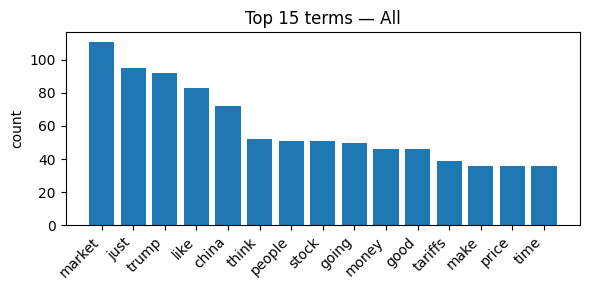

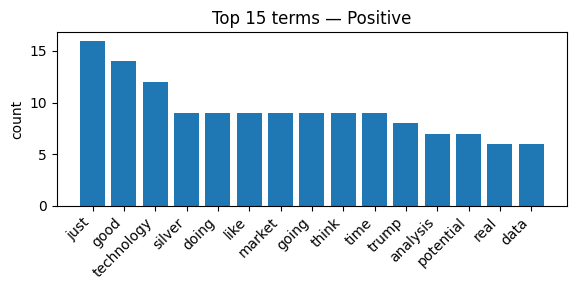

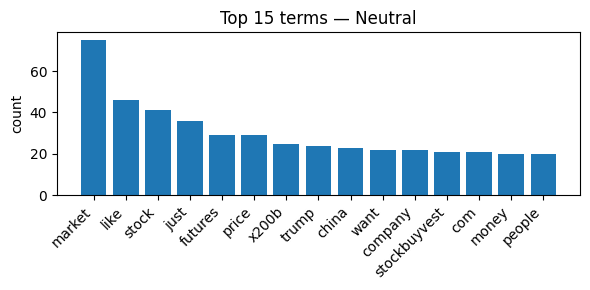

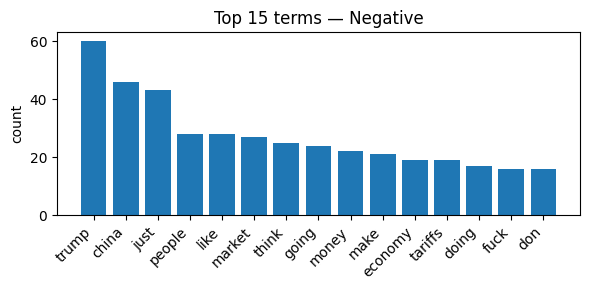

Vocab after reduction: 444 terms (min_df=5, max_df=0.5, max_features=3000); showing top 15.


In [31]:
# EX13 — reduce vocab and visualize fewer (but better) terms

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

assert "df" in globals() and "text_col" in globals() and "label_col" in globals(), "Run PRE-EX1 first."

# knobs: tighten these to reduce terms further
MIN_DF = 5          # remove words that appear in <5 documents
MAX_DF = 0.50       # remove words that appear in >50% of documents (too common)
MAX_FEATURES = 3000 # cap vocab size
TOP_K = 15          # show only top-K terms

# fit ONCE on all docs with df-thresholds
vec = CountVectorizer(stop_words="english", min_df=MIN_DF, max_df=MAX_DF, max_features=MAX_FEATURES)
X_df = vec.fit_transform(df[text_col].astype(str))
terms = np.array(vec.get_feature_names_out())

def topk(mask=None, k=TOP_K):
    Xm = X_df if mask is None else X_df[np.asarray(mask, dtype=bool)]
    if Xm.shape[0] == 0:
        return pd.DataFrame({"term": [], "count": []})
    counts = np.asarray(Xm.sum(axis=0)).ravel()
    nz = counts > 0
    if nz.sum() == 0:
        return pd.DataFrame({"term": [], "count": []})
    k = min(k, nz.sum())
    idx = np.argpartition(-counts, k-1)[:k]
    idx = idx[np.argsort(-counts[idx])]
    return pd.DataFrame({"term": terms[idx], "count": counts[idx]})

groups = {
    "All":      topk(None),
    "Positive": topk(df[label_col].to_numpy()==1.0),
    "Neutral":  topk(df[label_col].to_numpy()==0.0),
    "Negative": topk(df[label_col].to_numpy()==-1.0),
}

# simple bar plot helper
def plot_bar(title, data):
    plt.figure(figsize=(6,3))
    plt.bar(data["term"], data["count"])
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

for name, data in groups.items():
    plot_bar(f"Top {len(data)} terms — {name}", data)

print(f"Vocab after reduction: {len(terms)} terms "
      f"(min_df={MIN_DF}, max_df={MAX_DF}, max_features={MAX_FEATURES}); showing top {TOP_K}.")


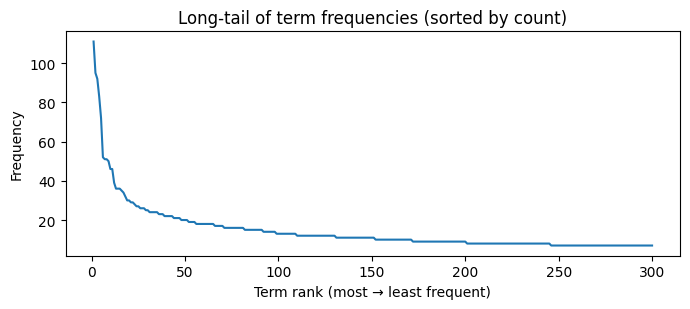

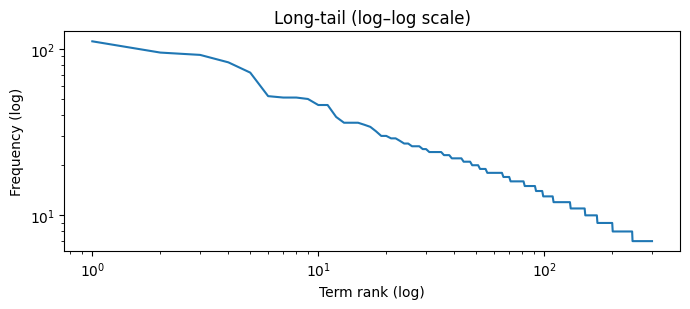

Total vocab considered: 444; top-300 shown. Sorting by frequency exposes the long-tail: few very common terms, many rare ones.


In [32]:
# EX14 — long-tail: sort terms by frequency (descending) and plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

assert "df" in globals() and "text_col" in globals(), "Run PRE-EX1 first."

# reuse a reduced-but-reasonable vocab so the plot is readable
vec = CountVectorizer(stop_words="english", min_df=5, max_df=0.5, max_features=5000)
X_all = vec.fit_transform(df[text_col].astype(str))
terms = vec.get_feature_names_out()
freq = np.asarray(X_all.sum(axis=0)).ravel()

# sort by frequency desc
order = np.argsort(-freq)
freq_sorted = freq[order]
terms_sorted = terms[order]

# optional: cap to first N for display while keeping shape intuition
N = min(300, len(freq_sorted))  # show top 300 terms
x = np.arange(1, N+1)

plt.figure(figsize=(7,3.2))
plt.plot(x, freq_sorted[:N])
plt.title("Long-tail of term frequencies (sorted by count)")
plt.xlabel("Term rank (most → least frequent)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# log-log view emphasizes power-law-ish tail (optional but illustrative)
plt.figure(figsize=(7,3.2))
plt.plot(x, freq_sorted[:N])
plt.xscale("log"); plt.yscale("log")
plt.title("Long-tail (log–log scale)")
plt.xlabel("Term rank (log)")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()

print(f"Total vocab considered: {len(terms)}; top-{N} shown. "
      "Sorting by frequency exposes the long-tail: few very common terms, many rare ones.")


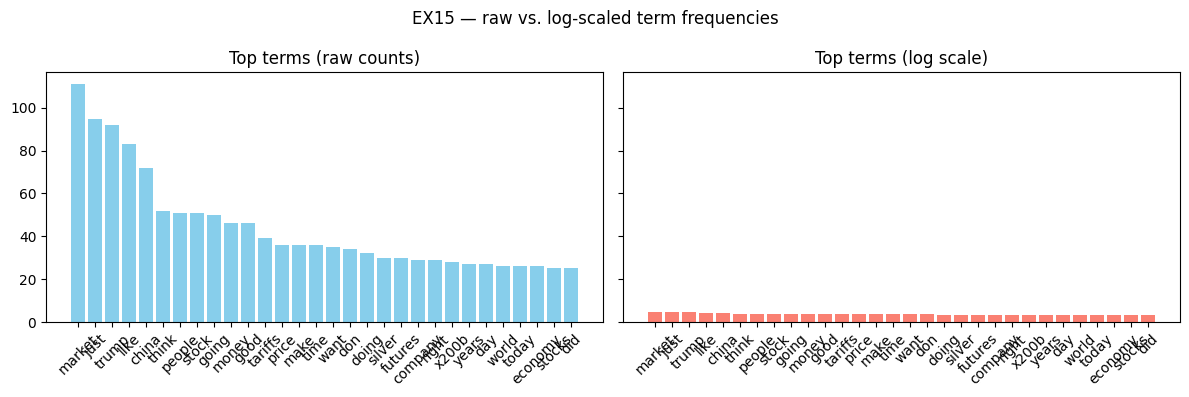

In [33]:
# EX15 — compare raw vs. log-scaled term frequencies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

assert "df" in globals() and "text_col" in globals(), "Run PRE-EX1 first."

# vectorize (same reduced vocab as before for clarity)
vec = CountVectorizer(stop_words="english", min_df=5, max_df=0.5, max_features=5000)
X_all = vec.fit_transform(df[text_col].astype(str))
terms = vec.get_feature_names_out()
freq = np.asarray(X_all.sum(axis=0)).ravel()

# sort by frequency
order = np.argsort(-freq)
terms_sorted = terms[order]
freq_sorted = freq[order]

# log-transform
freq_log = np.log1p(freq_sorted)  # log(1+x) to avoid log(0)

# plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

N = min(30, len(freq_sorted))

axes[0].bar(terms_sorted[:N], freq_sorted[:N], color="skyblue")
axes[0].set_title("Top terms (raw counts)")
axes[0].tick_params(axis="x", rotation=45)

axes[1].bar(terms_sorted[:N], freq_log[:N], color="salmon")
axes[1].set_title("Top terms (log scale)")
axes[1].tick_params(axis="x", rotation=45)

fig.suptitle("EX15 — raw vs. log-scaled term frequencies")
plt.tight_layout()
plt.show()


# Phase 2

In [35]:
# EX16 — Filtering frequent/infrequent words per sentiment category

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

assert "df" in globals() and "text_col" in globals() and "label_name" in df.columns, "Run PRE-EX1 first."

# categories = sentiment labels
categories = df["label_name"].unique()
category_dfs = {cat: df[df["label_name"] == cat].copy() for cat in categories}

# helper: build term-document matrix
def create_term_document_df(df_cat):
    vec = CountVectorizer(stop_words="english")
    X_counts = vec.fit_transform(df_cat[text_col].astype(str))
    words = vec.get_feature_names_out()
    return pd.DataFrame(X_counts.toarray(), columns=words)

# build matrices for each category
filt_term_document_dfs = {cat: create_term_document_df(category_dfs[cat]) for cat in categories}

# function to filter top 5% and bottom 1% terms by total frequency
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # words to remove
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # print filtered words for review
    print(f"\nBottom {bottom_percent*100:.0f}% words:\n{sorted_words.head(bottom_n)}")
    print(f"\nTop {top_percent*100:.0f}% words:\n{sorted_words.tail(top_n)}")

    return term_document_df.drop(columns=words_to_remove)

# apply filtering per sentiment category
term_document_dfs = {}
for cat in categories:
    print(f"\n--- Category: {cat} ---")
    term_document_dfs[cat] = filter_top_bottom_words_by_sum(filt_term_document_dfs[cat])

# show one filtered DataFrame (example: first category)
cat0 = categories[0]
print(f"\nFiltered Term-Document Frequency DataFrame for Category: {cat0}")
display(term_document_dfs[cat0].head())



--- Category: negative ---

Bottom 1% words:
kidding          1
industries       1
indulging        1
individuals      1
individualism    1
indicted         1
india            1
indexes          1
incredibly       1
incredible       1
increasing       1
incompetent      1
skills           1
impose           1
importers        1
important        1
slowing          1
impeached        1
inequality       1
dtype: int64

Top 5% words:
ccp        6
happen     6
lost       6
lot        6
dont       6
          ..
like      28
people    28
just      43
china     46
trump     60
Length: 99, dtype: int64

--- Category: neutral ---

Bottom 1% words:
zsil            1
shitting        1
image           1
shooting        1
illegal         1
ii              1
ignorance       1
shoppers        1
icu             1
ibit            1
ibd             1
impact          1
hypothetical    1
hyped           1
hype            1
hut             1
hurts           1
hurt            1
hunter          1
hugues    

,000,02,03,10,100,1000,10000,11,12,13,...,x200b,ya,yea,yeah,year,yields,yippee,yo,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After filtering the top 5% most frequent and bottom 1% least frequent words, clear patterns emerge across categories. Negative posts often highlight political blame and dissatisfaction with words like “trump,” “china,” and “lost,” while neutral posts are dominated by factual trading terms such as “market,” “stock,” and “futures.” Positive posts emphasize optimism with words like “buy,” “hold,” “better,” and “good.” Despite these differences, all categories share very common terms like “market,” “stock,” and “like,” which are removed as uninformative. This filtering step helps remove noise and keep mid-frequency words that better capture the sentiment of each category.


In [40]:
!pip install mlxtend


python(54932) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [43]:
# EX17 — Frequent pattern mining with FP-Growth on Reddit dataset

from mlxtend.frequent_patterns import fpgrowth, association_rules

# We’ll use the filtered term-document matrices from EX16
# Each category gets mined separately

for cat in categories:
    print(f"\n=== Frequent patterns for category: {cat} ===")
    
    # FP-Growth to find frequent itemsets
    itemsets = fpgrowth(term_document_dfs[cat] > 0, min_support=0.02, use_colnames=True)
    itemsets = itemsets.sort_values("support", ascending=False)
    print(itemsets.head(10))
    
    # Association rules
    if not itemsets.empty:
        rules = association_rules(itemsets, metric="lift", min_threshold=1.0)
        print("\nSample rules:")
        print(rules.head(10))



=== Frequent patterns for category: negative ===
Empty DataFrame
Columns: [support, itemsets]
Index: []

=== Frequent patterns for category: neutral ===
Empty DataFrame
Columns: [support, itemsets]
Index: []

=== Frequent patterns for category: positive ===
     support    itemsets
0   0.036697     (world)
13  0.036697     (right)
29  0.036697   (looking)
18  0.036697     (stock)
9   0.036697       (bad)
32  0.036697      (mean)
33  0.036697     (money)
24  0.036697      (want)
26  0.027523    (people)
27  0.027523  (changing)

Sample rules:
  antecedents consequents  antecedent support  consequent support   support  \
0    (points)      (main)            0.027523            0.027523  0.027523   
1      (main)    (points)            0.027523            0.027523  0.027523   

   confidence       lift  representativity  leverage  conviction  \
0         1.0  36.333333               1.0  0.026765         inf   
1         1.0  36.333333               1.0  0.026765         inf   

   zhang

In [45]:
# EX18 — Building TF-IDF features from Reddit posts

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english", max_features=2000, min_df=5)
X_tfidf = tfidf.fit_transform(df[text_col].astype(str))

print("TF-IDF matrix shape:", X_tfidf.shape)

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Show sample
display(tfidf_df.head())


TF-IDF matrix shape: (847, 444)


,10,100,11,12,15,20,2025,25,30,4271,...,wouldn,wrong,wsb,x200b,xi,yeah,year,years,yes,yields
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160386,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [46]:
# EX19 — Naive Bayes classification on Reddit dataset

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Prepare labels
y = df[label_col]

# 1) Frequency features (CountVectorizer)
freq_vec = CountVectorizer(stop_words="english", max_features=2000, min_df=5)
X_freq = freq_vec.fit_transform(df[text_col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X_freq, y, test_size=0.2, random_state=42)

nb_freq = MultinomialNB()
nb_freq.fit(X_train, y_train)
y_pred_freq = nb_freq.predict(X_test)

print("=== Naive Bayes (Word Frequency) ===")
print(classification_report(y_test, y_pred_freq))

# 2) TF-IDF features
tfidf_vec = TfidfVectorizer(stop_words="english", max_features=2000, min_df=5)
X_tfidf = tfidf_vec.fit_transform(df[text_col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test)

print("\n=== Naive Bayes (TF-IDF) ===")
print(classification_report(y_test, y_pred_tfidf))


=== Naive Bayes (Word Frequency) ===
              precision    recall  f1-score   support

        -1.0       0.55      0.58      0.57        67
         0.0       0.53      0.67      0.59        73
         1.0       0.17      0.03      0.06        30

    accuracy                           0.52       170
   macro avg       0.41      0.43      0.40       170
weighted avg       0.47      0.52      0.49       170


=== Naive Bayes (TF-IDF) ===
              precision    recall  f1-score   support

        -1.0       0.60      0.49      0.54        67
         0.0       0.49      0.77      0.60        73
         1.0       0.00      0.00      0.00        30

    accuracy                           0.52       170
   macro avg       0.36      0.42      0.38       170
weighted avg       0.45      0.52      0.47       170



/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juhoviljanen/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



The Naive Bayes classifier shows moderate performance overall, with accuracy around 52% for both word frequency and TF–IDF features. Negative and neutral posts are classified reasonably well, with neutral performing best under TF–IDF (recall of 0.77). However, the positive class is poorly predicted in both cases, with TF–IDF failing to classify any positive samples at all. This suggests that positive posts in this dataset are less distinctive or less represented compared to neutral and negative ones, which makes them harder for the model to capture. The difference between frequency and TF–IDF features highlights how feature weighting can shift performance between categories, but overall performance remains limited with such a simple baseline classifier.

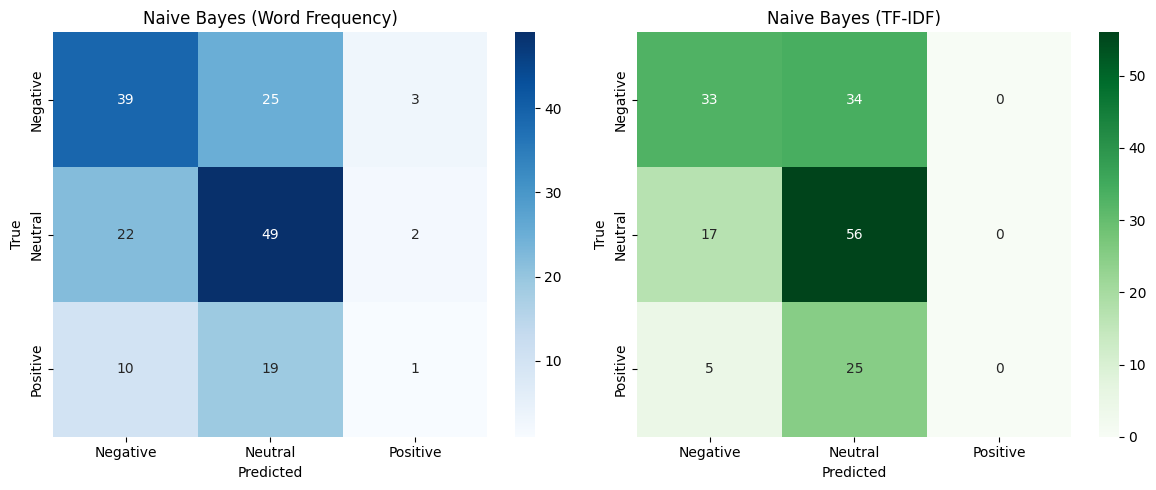

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Confusion matrix for word frequency
cm_freq = confusion_matrix(y_test, y_pred_freq, labels=[-1.0, 0.0, 1.0])
sns.heatmap(cm_freq, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
axes[0].set_title("Naive Bayes (Word Frequency)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Confusion matrix for TF-IDF
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf, labels=[-1.0, 0.0, 1.0])
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
axes[1].set_title("Naive Bayes (TF-IDF)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()
